In [2]:
#Attempted Visualisation of Indonesian Contraceptive Method Choice Data Set
#https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

# 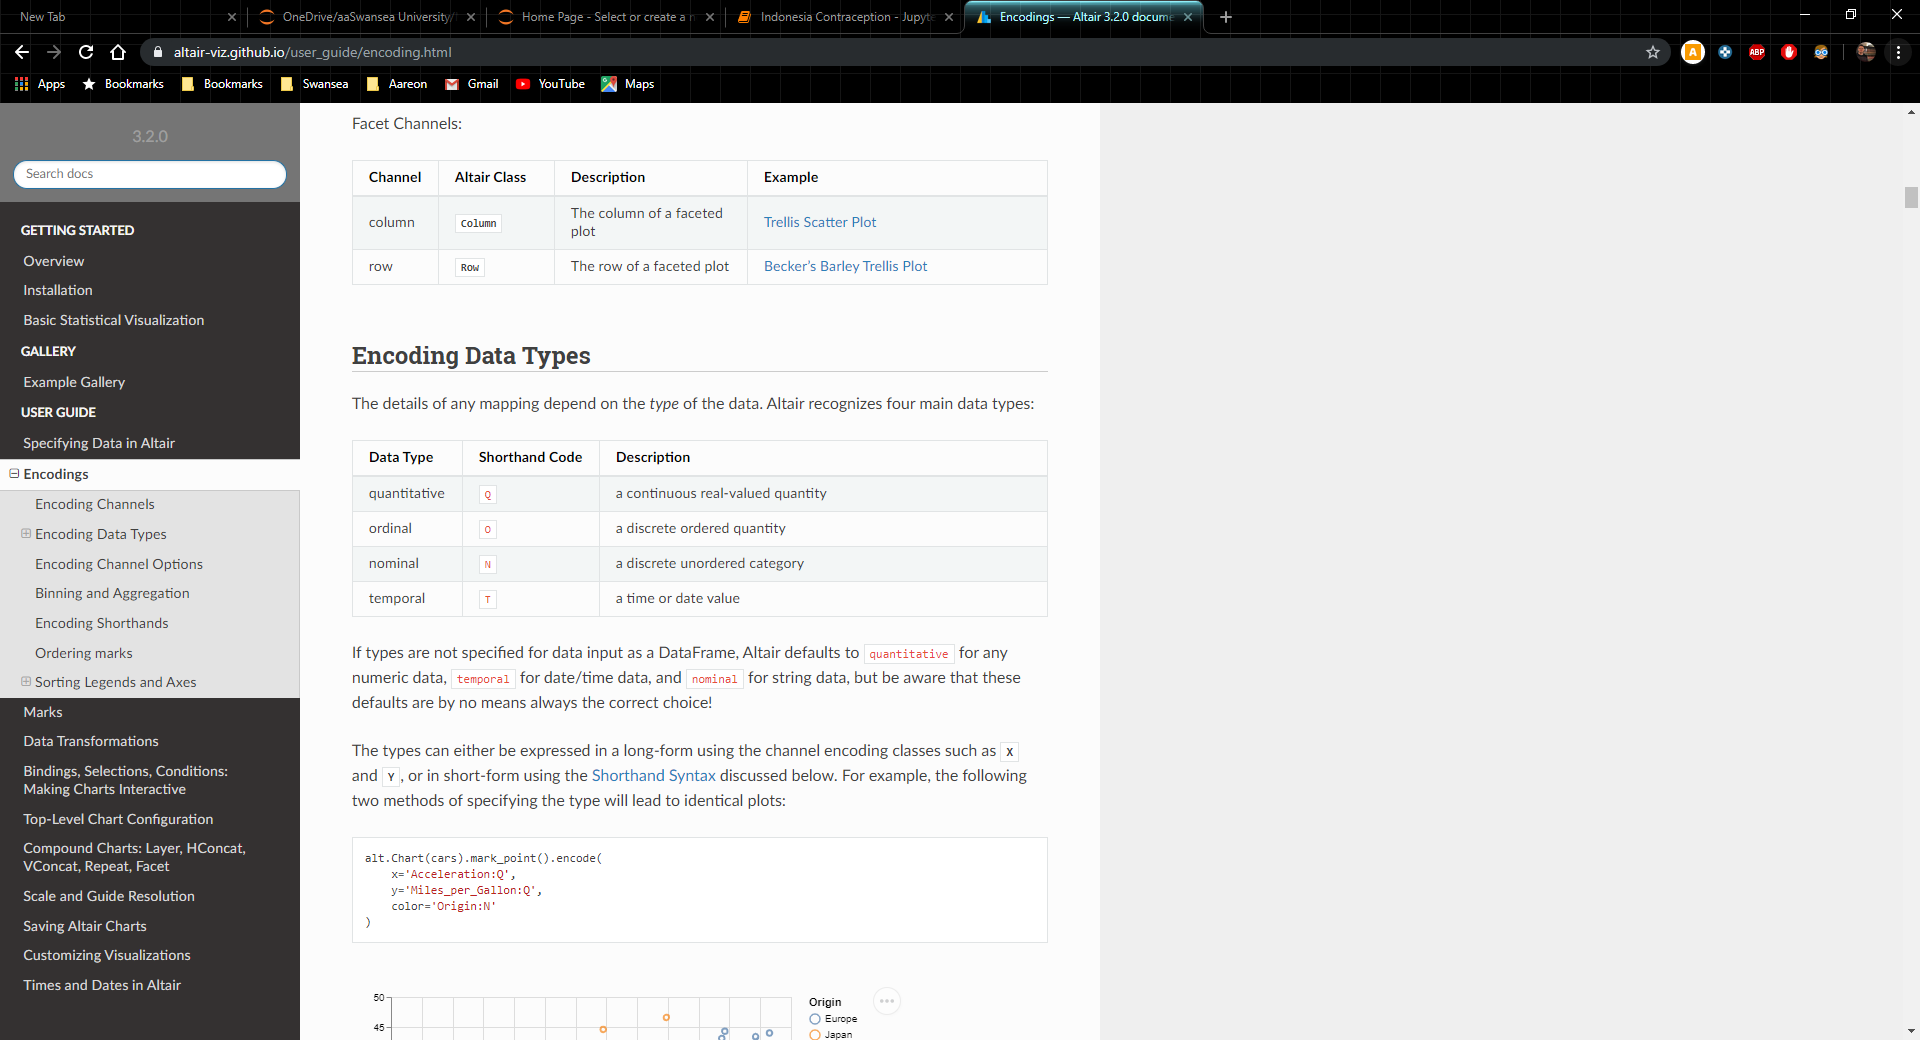


#Data Type	    Shorthand Code	Description
#quantitative	Q	            a continuous real-valued quantity
#ordinal	    O	            a discrete ordered quantity
#nominal	    N	            a discrete unordered category
#temporal	    T	            a time or date value

In [3]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [4]:
#Read file and tidy up data.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data')


df.columns = ['Wife age', 'Wife education', 'Husband education', 'Num children', 'Wife religion', 'Wife working', 'Husband occupation', 'SOL index', 'Media exposure', 'Contraception']

'''
Not sure whether to replace or not. ATM it is nice and Ordinal.
df['Wife education']= df['Wife education'].replace(1, "Low")
df['Wife education']= df['Wife education'].replace(2, "Below average")
df['Wife education']= df['Wife education'].replace(3, "Average")
df['Wife education']= df['Wife education'].replace(4, "Above average")
df['Wife education']= df['Wife education'].replace(5, "High")
'''

df['Wife religion']= df['Wife religion'].replace(0, "Non-Islam")
df['Wife religion']= df['Wife religion'].replace(1, "Islam")

df['Wife working']= df['Wife working'].replace(0, "Yes")
df['Wife working']= df['Wife working'].replace(1, "No")

df['Media exposure']= df['Media exposure'].replace(0, "Good")
df['Media exposure']= df['Media exposure'].replace(1, "Not good")

df["Contraception"]= df["Contraception"].replace(1, "No-use") 
df["Contraception"]= df["Contraception"].replace(2, "Long-term") 
df["Contraception"]= df["Contraception"].replace(3, "Short-term") 

print(df.shape)
df.head(10)

(1472, 10)


,Wife age,Wife education,Husband education,Num children,Wife religion,Wife working,Husband occupation,SOL index,Media exposure,Contraception
0,45,1,3,10,Islam,No,3,4,Good,No-use
1,43,2,3,7,Islam,No,3,4,Good,No-use
2,42,3,2,9,Islam,No,3,3,Good,No-use
3,36,3,3,8,Islam,No,3,2,Good,No-use
4,19,4,4,0,Islam,No,3,3,Good,No-use
5,38,2,3,6,Islam,No,3,2,Good,No-use
6,21,3,3,1,Islam,Yes,3,2,Good,No-use
7,27,2,3,3,Islam,No,3,4,Good,No-use
8,45,1,1,8,Islam,No,2,2,Not good,No-use
9,38,1,3,2,Islam,Yes,3,3,Not good,No-use


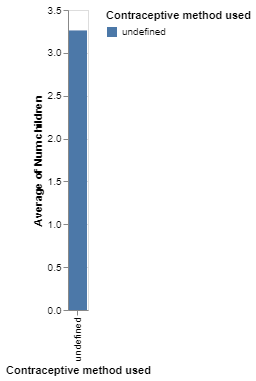

In [5]:
one = alt.Chart(df).mark_bar(color = 'firebrick').encode(
    x='Contraceptive method used:N',
    y='average(Num children):Q',
    color='Contraceptive method used:N'
    #color='SOL index:O'
)
one

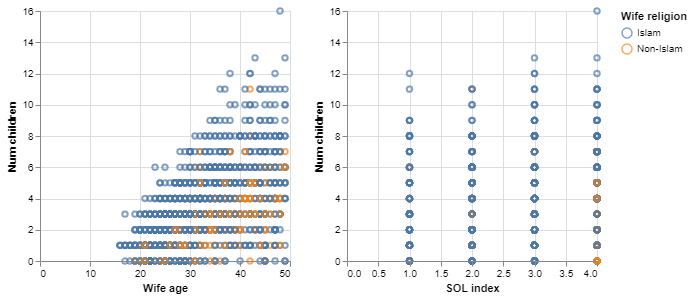

In [6]:
##Multi-panel Scatter Plot with Linked Brushing
#https://altair-viz.github.io/gallery/scatter_linked_brush.html

brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(df).mark_point().encode(
    y='Num children',
    color=alt.condition(brush, 'Wife religion', alt.ColorValue('gray')),
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

base.encode(x='Wife age') | base.encode(x='SOL index')

In [7]:
one = alt.Chart(df).mark_bar(color='firebrick').encode(
    x='contraception',
    y='average(Num children)',
    color='Contraception'
)

two = alt.Chart(df).mark_bar(color='firebrick').encode(
    x='Contraception',
    y='Num children'    
)

one | two

ValueError: contraception encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.HConcatChart(...)

In [8]:
##Seattle Weather Interactive
#https://altair-viz.github.io/gallery/seattle_weather_interactive.html

#TRY
#Average Num of children on left, wife age on bottom.   #shape=religion? #color=contraception?
#beneath can have the different (anything) e.g. SOL index

##OOOOOOO say that allowing users to select age also gives us the advantage of seeing the trends over time as obvious the younger people will be more recent

scale = alt.Scale(domain=['Long-term', 'Short-term', 'No-use'],range=['#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('Contraception:N', scale=scale)

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])

# Top panel is scatter plot of children Num vs age
points = alt.Chart(df).mark_point().encode(
    alt.X('Wife age:Q', title='Age'),
    alt.Y('Num children:Q', title='Number of children'),  #Removed scale=alt.Scale(domain=[-5, 40]
    color= alt.condition(brush, color, alt.value('lightgray')),
    size=alt.Size('Contraception:Q', scale=alt.Scale(range=[5, 200]))
).properties(
    width=550,
    height=300
).add_selection(
    brush
).transform_filter(
    click
)

points



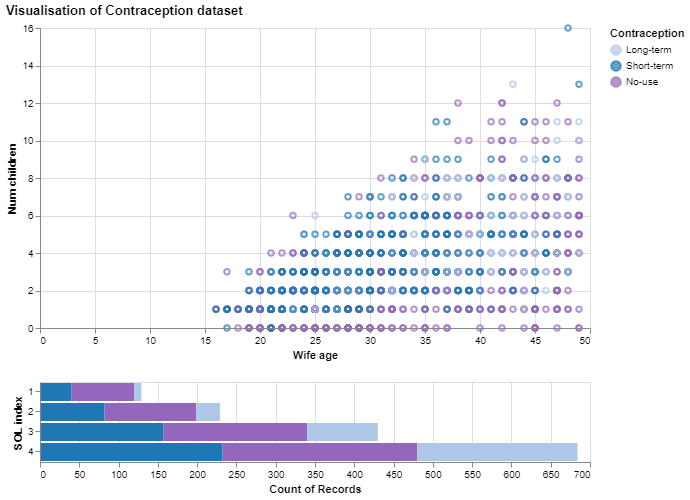

In [9]:
scale = alt.Scale(domain=['Long-term', 'Short-term', 'No-use'],range=['#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('Contraception:N', scale=scale)

brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])

# Top panel is scatter plot of children Num vs age
points = alt.Chart(df).mark_point().encode(
    alt.X('Wife age:Q'),
    alt.Y('Num children:Q'),
    color= alt.condition(brush, color, alt.value('lightgray'))
).properties(
    width=550,
    height=300
).add_selection(
    brush
) .transform_filter(click)#.properties(width=250, hight=250)

#Cant get the clicking functionality but im more than okay with that.


# Bottom panel is a bar chart of weather type
bars = alt.Chart(df).mark_bar().encode(
    x='count()',
    y='SOL index:O',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=550,
).add_selection(
    click
)

daveVisualisation = alt.vconcat(points, bars, data=df, title="Visualisation of Contraception dataset")
daveVisualisation

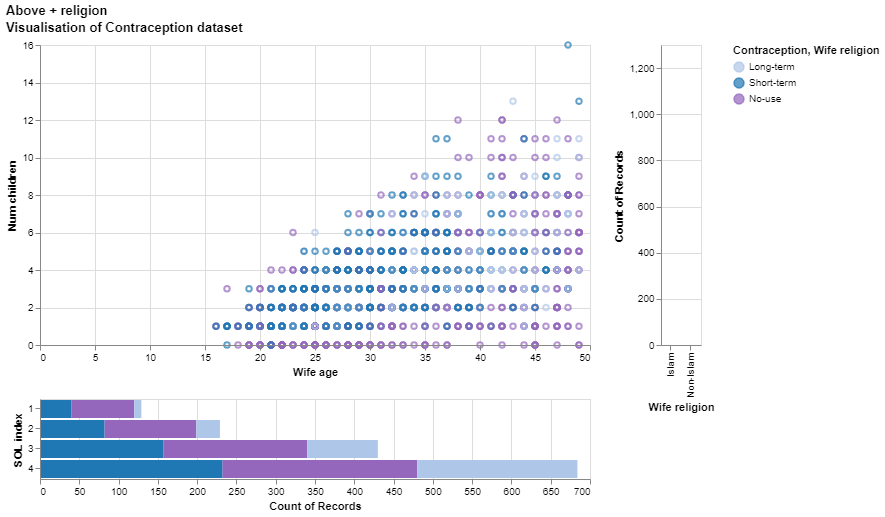

In [10]:
#Above but added religion to right
'''
relScale = alt.Scale(domain=['Islam', 'Non-Islam'],range=['#ffffff', '#111111'])
relColor = alt.Color('Wife religion:N', scale=relScale)
relClick = alt.selection_multi(encodings=['relColor'])
'''
rightBars = alt.Chart(df).mark_bar().encode(
    y='count()',
    x='Wife religion:N',
    color='Wife religion'
)

#daveVisualisation | rightBars
alt.hconcat(daveVisualisation, rightBars, data=df, title="Above + religion")


##Actualy discovered somthing interesting with this visualisation that the older a woman
#is the higher up on the standard of living index they are 

In [11]:
##added heatmap to above    #https://altair-viz.github.io/user_guide/compound_charts.html

heatmap = alt.Chart(source).mark_rect().encode(
    alt.X('Wife age:Q', bin=True),
    alt.Y('Num children:Q', bin=True),
    alt.Color('count()', scale=alt.Scale(scheme='greenblue')))

alt.vconcat(heatmap + points, bars, data=df, title="Visualisation of Contraception dataset")

NameError: name 'source' is not defined

In [ ]:
one = alt.Chart(df).mark_bar(color='firebrick').encode(
    x='SOL index',
    y='average(Num children)'    
)

two = alt.Chart(df).mark_point().encode(
    x='Wife age:Q',
    y='average(Num children)',
    size='max(Num children)'
)



(one + two) | two

In [ ]:
one = alt.Chart(df).mark_bar(color='firebrick').encode(
    x='average(SOL index)',
    y='Num children'    
)

two = alt.Chart(df).mark_bar(color='firebrick').encode(
    x='SOL index',
    y='average(Num children)'  
)

one | two

In [ ]:
#how old is the average woman that has this many children
'''
one = alt.Chart(df).mark_bar(color='firebrick').encode(
    x='average(Wife age)',
    y='Num children'    
)
'''

#how many children on average does a woman of this age have
two = alt.Chart(df.head(10)).mark_bar(color='firebrick').encode(
    x='Wife age',
    y='average(Num children)'  
)

#TOTAL number of children had by women of different ages
three = alt.Chart(df.head(10)).mark_bar().encode(
    x='Wife age',
    y='Num children'  
)

#TOTAL number of children had by women of different ages
threeB = alt.Chart(df.head(10)).mark_point(color='firebrick').encode(
    x='Wife age',
    y='Num children'  
)

#one | two | three
two | (three + threeB)

In [ ]:
one = alt.Chart(df).mark_line(color = 'firebrick').encode(
    x='Wife age:Q',
    y='average(Num children):Q'
    #color='SOL index:O'
).properties(
    width=700,
    height=400
)

two = alt.Chart(df).mark_point().encode(
    x='Wife age:Q',
    y='average(Num children):Q',
    color='SOL index:O'
).properties(
    width=700,
    height=400
)

(one + two).interactive()

In [ ]:
alt.Chart(df).mark_point().encode(
    x='average(Wife age):Q',
    y='Wife education:O'
   
)

In [ ]:
 education_religion = alt.Chart(df).mark_bar().encode(
    x='Wife religion:N',
    y='average(Wife education):Q',
     color = "Wife religion"
)

numchildren_religion = alt.Chart(df).mark_bar().encode(
    x='Wife religion:N',
    y='average(Num children):Q',
    color = "Wife religion"
)

(education_religion | numchildren_religion)

In [ ]:
alt.Chart(df).mark_line().encode(
    alt.Size('SOL index:O'),
    x='Wife age:Q',
    y='count(Wife age):Q',
    color='SOL index:O'
).interactive()

In [ ]:
source = df

alt.Chart(source).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Contraceptive method used:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Wife age', 'Num children', 'SOL index'],
    column=['SOL index', 'Num children', 'Wife age']
).interactive()


#make it so that if I select a point it will

In [ ]:
#Histogram of age

selector = alt.selection_single(empty='all', fields=['Wife age'])

color_scale = alt.Scale(domain=['Long-term', 'No-use', 'Short-term'],
                        range=['#00ff00', '#ff0000', '#fa9600'])

base = alt.Chart(source).properties(
    width=250,
    height=250
).add_selection(selector)

hists = base.mark_bar(opacity=1, thickness=100).encode(
    x=alt.X('Wife age',
            bin=alt.Bin(step=5), # step keeps bin size the same
            scale=alt.Scale(domain=[0,100])),
    y=alt.Y('count()',
            stack=None,
            scale=alt.Scale(domain=[0,350])),
    color=alt.Color('Contraceptive method used:N',
                    scale=color_scale)
).transform_filter(
    selector
)

hists

In [ ]:
#MAYBE run a test to see which independent variables effect the dependednt variable the most


